In [1]:
import os
import numpy as np
import scipy.io
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.optimize import minimize

extract_folder = "PD_data"

mat_files = [os.path.join(extract_folder, f) for f in os.listdir(extract_folder) if f.endswith(".mat")]

all_data_train = []
all_data_test = []

for file in mat_files:
    mat_contents = scipy.io.loadmat(file)
    
    # Extract column labels
    data_labels = [label[0] for label in mat_contents["data_labels"].flatten()]
    
    # Convert data_train and data_test to DataFrames
    train_df = pd.DataFrame(mat_contents["data_train"], columns=data_labels)
    test_df = pd.DataFrame(mat_contents["data_test"], columns=data_labels)
    
    # Add participant ID
    participant_id = os.path.basename(file).replace(".mat", "")
    train_df["participant_id"] = participant_id
    test_df["participant_id"] = participant_id
    
    # Append to lists
    all_data_train.append(train_df)
    all_data_test.append(test_df)

# Combine all participants' data
full_data_train_df = pd.concat(all_data_train, ignore_index=True)
full_data_test_df = pd.concat(all_data_test, ignore_index=True)

In [2]:
# Exclude non-numeric columns before correlation analysis
numeric_train_df = full_data_train_df.select_dtypes(include=[np.number])
numeric_test_df = full_data_test_df.select_dtypes(include=[np.number])

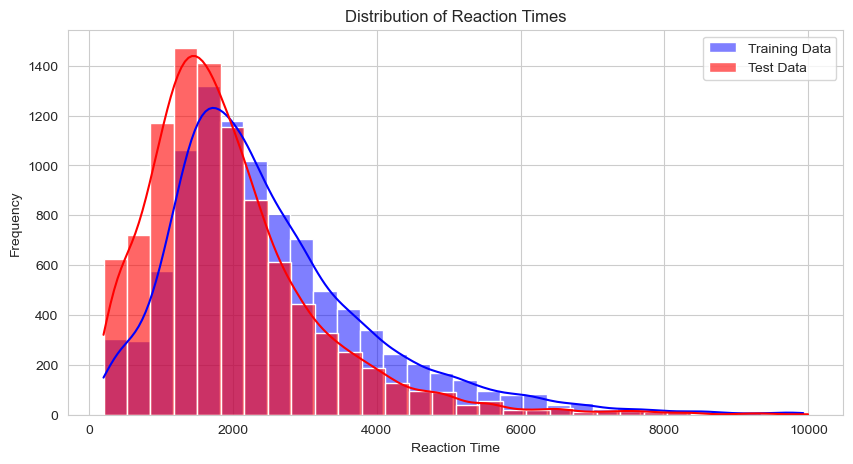

In [3]:
# Visualization
sns.set_style("whitegrid")

# Histogram of Reaction Times
plt.figure(figsize=(10, 5))
sns.histplot(full_data_train_df['RT'].dropna(), bins=30, kde=True, color='blue', label='Training Data')
sns.histplot(full_data_test_df['RT'].dropna(), bins=30, kde=True, color='red', label='Test Data', alpha=0.6)
plt.xlabel('Reaction Time')
plt.ylabel('Frequency')
plt.title('Distribution of Reaction Times')
plt.legend()
plt.show()

- The histogram shows the distribution of reaction times for both training (blue) and test (red) datasets.
- The distribution is right-skewed, meaning that most decisions are made quickly, but some trials have significantly longer RTs.
- Most participants respond within a certain range, but a few trials involve much longer deliberation times.

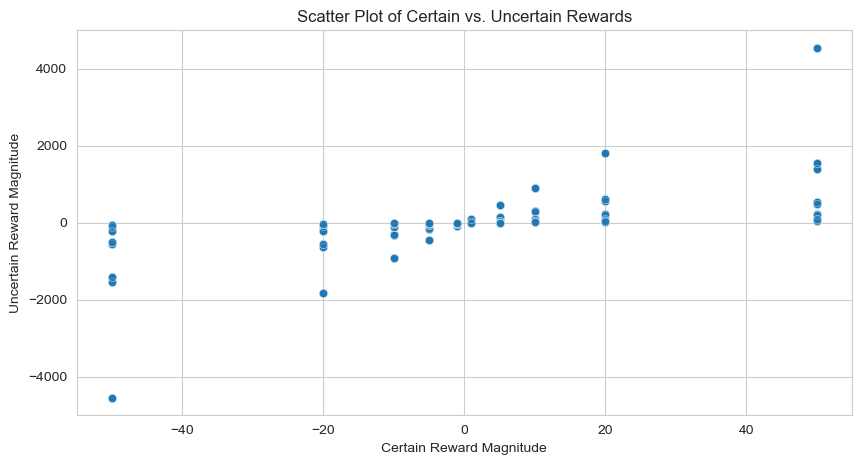

In [4]:
# Scatter Plot: Certain vs. Uncertain Reward Magnitudes
plt.figure(figsize=(10, 5))
sns.scatterplot(x=full_data_train_df['certOutcome'], y=full_data_train_df['uncOutcome'], alpha=0.5)
plt.xlabel('Certain Reward Magnitude')
plt.ylabel('Uncertain Reward Magnitude')
plt.title('Scatter Plot of Certain vs. Uncertain Rewards')
plt.show()

- The spread of the points suggests a range of risk-taking behaviors among participants.
- A clear clustering pattern may indicate that participants were exposed to a few fixed experimental conditions.

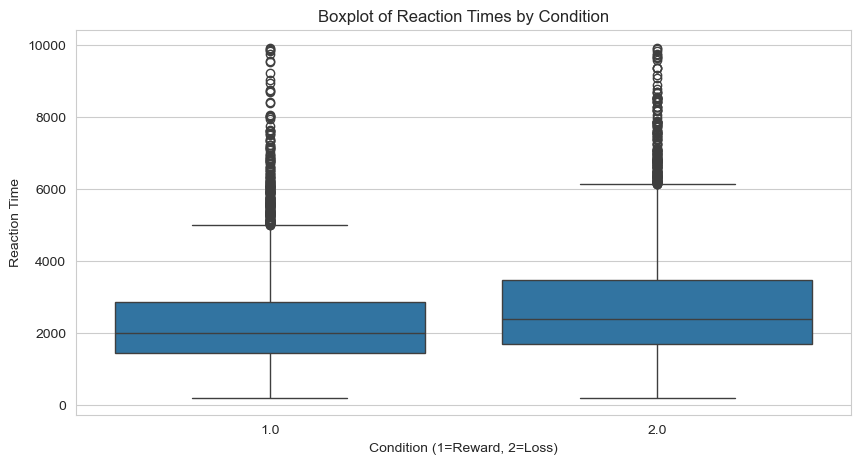

In [5]:
# Boxplot of Reaction Times by Condition
plt.figure(figsize=(10, 5))
sns.boxplot(x=full_data_train_df['condition (1=reward,2=loss)'], y=full_data_train_df['RT'])
plt.xlabel('Condition (1=Reward, 2=Loss)')
plt.ylabel('Reaction Time')
plt.title('Boxplot of Reaction Times by Condition')
plt.show()

- This visualization compares RT distributions for reward-based vs. loss-based decision-making conditions.
- If the median RTs are higher for one condition, it suggests that participants took more time to deliberate.
- The presence of outliers in either condition may indicate difficult trials where participants took longer to decide.
- If reward discounting has a higher median RT, it might indicate more careful deliberation in reward-seeking behavior
- If loss discounting has a higher median RT, it suggests that participants hesitate more when making loss-related decisions.

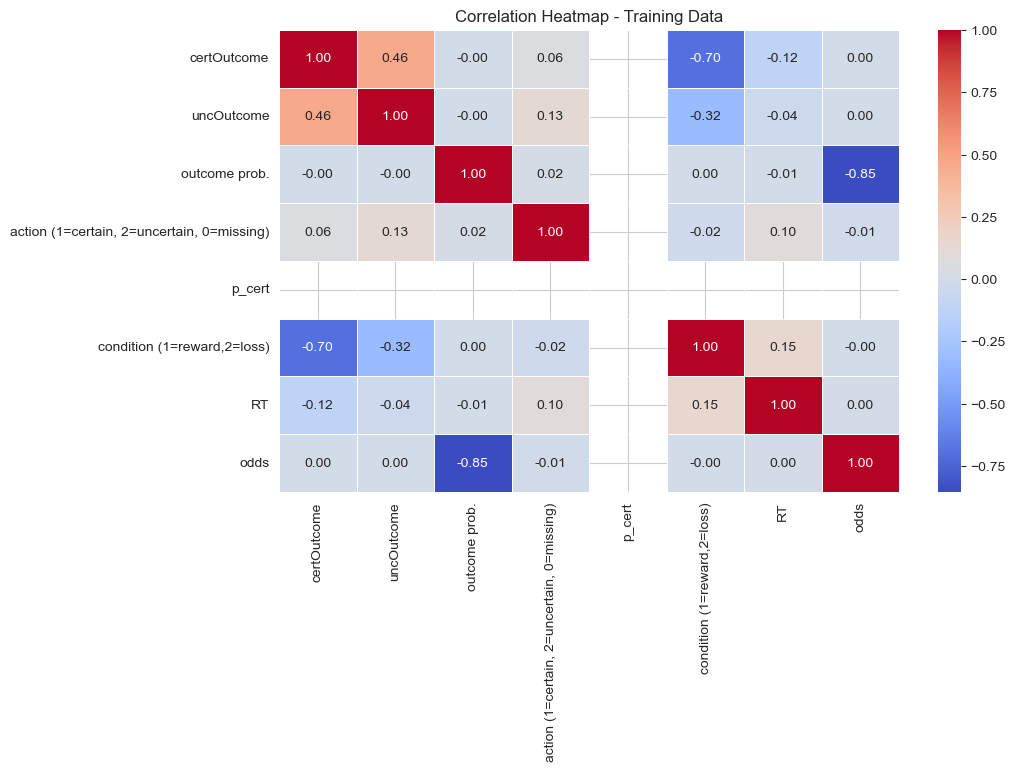

In [6]:
# Correlation Heatmap for Training Data
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_train_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap - Training Data')
plt.show()

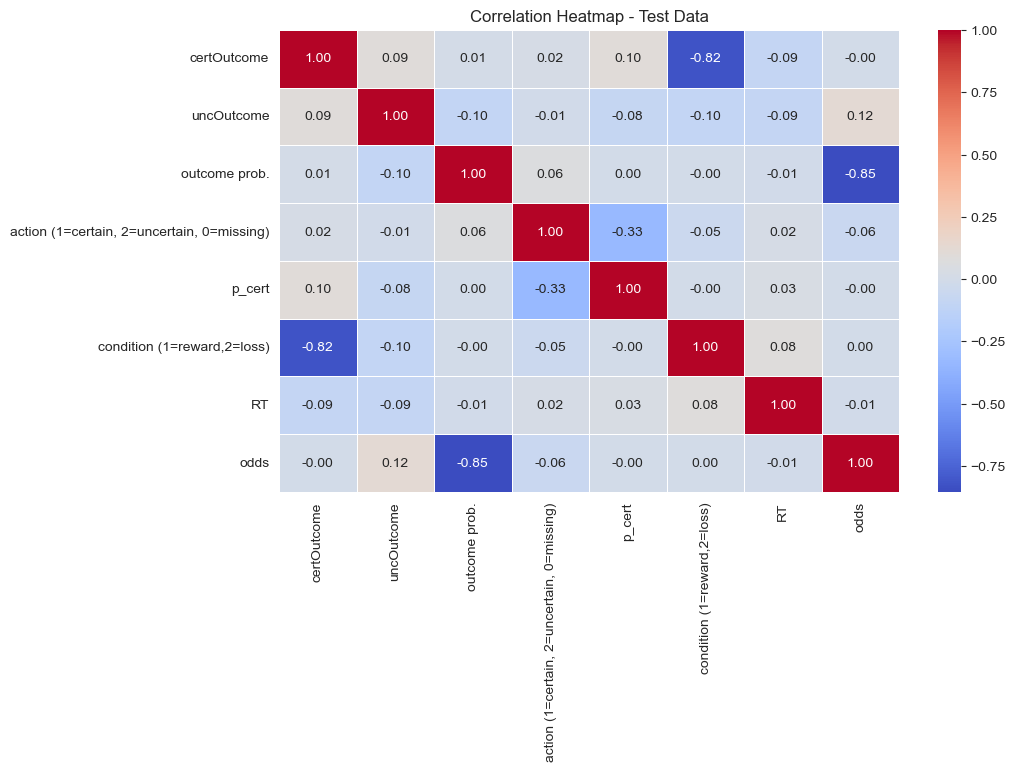

In [7]:
# Correlation Heatmap for Test Data
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_test_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap - Test Data')
plt.show()